In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score



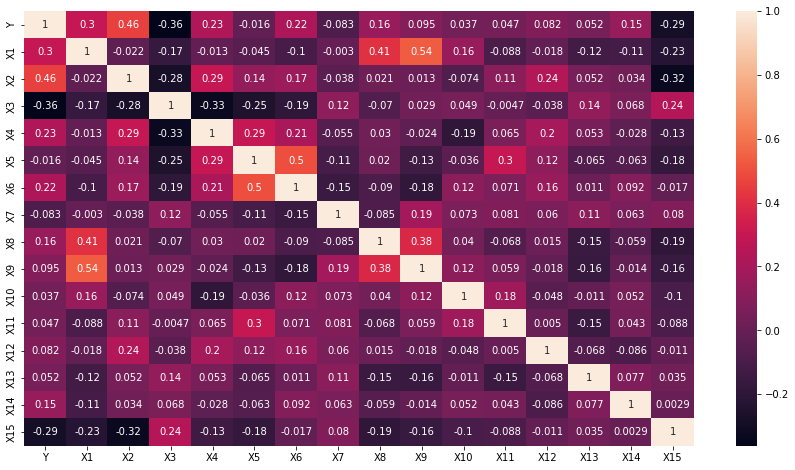

In [57]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, data=df)

no high correlation between variables

#**Artificial Neural Networks**

In [ ]:
df_xlsx = pd.read_excel("data covid.xlsx")
df_xlsx.to_csv("data_covid.csv", index = False)

In [ ]:
covid = pd.read_csv("data_covid.csv")
df = covid.copy()

In [ ]:
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
0,1,52,1,97,24,2100,36.0,2,0,1,0,3400,5,1,1,15
1,1,61,0,96,20,2500,46.0,1,0,0,1,4500,3,1,1,15
2,1,43,0,96,20,8600,131.0,1,0,0,0,11000,4,1,1,15
3,1,37,0,96,18,3100,20.4,2,0,0,0,4320,8,1,1,15
4,1,55,0,97,18,3700,42.0,1,0,0,0,5340,1,1,1,15


In [54]:
df.isnull().sum()

Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
dtype: int64

In [ ]:
df.tail()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
117,2,66,1,93,24,5500,36.5,1,0,0,0,7550,7,1,0,15
118,2,49,1,96,19,5400,76.7,1,0,0,0,6470,10,1,0,15
119,2,82,0,89,18,4500,5.8,1,1,1,0,7760,1,0,0,15
120,2,86,0,95,18,3500,44.7,2,0,1,0,5490,7,1,1,15
121,2,74,0,98,19,4600,55.4,1,0,0,0,6610,8,0,1,15


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,122.0,1.426230,0.496567,1.0,1.000,1.00,2.000,2.0
X1,122.0,62.262295,14.600919,18.0,52.250,64.00,73.000,91.0
X2,122.0,0.377049,0.486646,0.0,0.000,0.00,1.000,1.0
X3,122.0,94.049180,6.049182,40.0,93.000,96.00,97.000,100.0
X4,122.0,19.114754,3.502530,12.0,18.000,18.00,20.000,34.0
X5,122.0,5035.237705,2891.828490,1400.0,3200.000,4400.00,5800.000,19100.0
X6,122.0,71.516393,81.304371,0.6,22.725,46.05,94.925,503.9
X7,122.0,1.393443,0.490528,1.0,1.000,1.00,2.000,2.0
X8,122.0,0.163934,0.371743,0.0,0.000,0.00,0.000,1.0
X9,122.0,0.426230,0.496567,0.0,0.000,0.00,1.000,1.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       122 non-null    int64  
 1   X1      122 non-null    int64  
 2   X2      122 non-null    int64  
 3   X3      122 non-null    int64  
 4   X4      122 non-null    int64  
 5   X5      122 non-null    int64  
 6   X6      122 non-null    float64
 7   X7      122 non-null    int64  
 8   X8      122 non-null    int64  
 9   X9      122 non-null    int64  
 10  X10     122 non-null    int64  
 11  X11     122 non-null    int64  
 12  X12     122 non-null    int64  
 13  X13     122 non-null    int64  
 14  X14     122 non-null    int64  
 15  X15     122 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 15.4 KB


In [ ]:
df.dtypes

Y        int64
X1       int64
X2       int64
X3       int64
X4       int64
X5       int64
X6     float64
X7       int64
X8       int64
X9       int64
X10      int64
X11      int64
X12      int64
X13      int64
X14      int64
X15      int64
dtype: object

In [ ]:
X = df.drop("Y",axis=1)
y = df["Y"]

In [ ]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
0,52,1,97,24,2100,36.0,2,0,1,0,3400,5,1,1,15
1,61,0,96,20,2500,46.0,1,0,0,1,4500,3,1,1,15
2,43,0,96,20,8600,131.0,1,0,0,0,11000,4,1,1,15
3,37,0,96,18,3100,20.4,2,0,0,0,4320,8,1,1,15
4,55,0,97,18,3700,42.0,1,0,0,0,5340,1,1,1,15


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Y, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
ann = tf.keras.models.Sequential() #Sequential = states that an artificial neural network is used.

In [ ]:
ann.add(tf.keras.layers.Dense(units = 8,activation="relu")) #I create 8 layers.

In [ ]:
ann.add(tf.keras.layers.Dense(units = 8,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units = 1,activation="sigmoid")) #output layer

In [ ]:
ann.compile(optimizer = "adam",loss ="binary_crossentropy",metrics=["accuracy"])

In [ ]:
ann.fit(X_train,y_train,epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 0.9801 - accuracy: 0.1340
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9435 - accuracy: 0.1546
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9107 - accuracy: 0.1753
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.8789 - accuracy: 0.2165
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8505 - accuracy: 0.2371
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8198 - accuracy: 0.2784
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7906 - accuracy: 0.3299
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7615 - accuracy: 0.3814
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7339 - accuracy: 0.4021
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7080 - accuracy: 0.4021
Epoch 11/100
4/4 [===========

In [ ]:
y_pred = ann.predict(X_test)

In [ ]:
y_pred = (y_pred > 0.5) #Accuracy values above 0.5

In [ ]:
cm = confusion_matrix(y_test , y_pred) #comparing the predicted y values with the actual y values

In [ ]:
cm 

array([[17,  0],
       [ 8,  0]])

0 wrong predictions

In [ ]:
accuracy_score(y_test,y_pred)

0.68

#**Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel="linear" , C =1.0, random_state = 5)

In [ ]:
model.fit(X_train,y_train)

SVC(kernel='linear', random_state=5)

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred

array([1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       2, 1, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.60      0.75      0.67         8

    accuracy                           0.76        25
   macro avg       0.73      0.76      0.74        25
weighted avg       0.78      0.76      0.77        25



In [ ]:
print(accuracy_score(y_test,pred))

0.76


linear SVM did a good job but I want to try other kernel functions

**Poly SVM**

In [ ]:
model2 = SVC(kernel="poly" , C =1.0, random_state = 5)

In [ ]:
model2.fit(X_train,y_train)

SVC(kernel='poly', random_state=5)

In [ ]:
pred2 = model2.predict(X_test)

In [ ]:
pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1])

In [ ]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           1       0.70      0.94      0.80        17
           2       0.50      0.12      0.20         8

    accuracy                           0.68        25
   macro avg       0.60      0.53      0.50        25
weighted avg       0.63      0.68      0.61        25



In [ ]:
print(accuracy_score(y_test,pred2))

0.68


**Radial Base Function SVM**

In [ ]:
model3 = SVC(kernel="rbf" , C =1.0, random_state = 5)

In [ ]:
model3.fit(X_train,y_train)

SVC(random_state=5)

In [ ]:
pred3 = model3.predict(X_test)

In [ ]:
pred3

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       2, 1, 1])

In [ ]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           1       0.75      0.71      0.73        17
           2       0.44      0.50      0.47         8

    accuracy                           0.64        25
   macro avg       0.60      0.60      0.60        25
weighted avg       0.65      0.64      0.65        25



In [ ]:
print(accuracy_score(y_test,pred3))

0.64


linear SVM gave the best results.